## Modelling from our previous data

We got to explore our datasets. 

Now we need to complete our data in order to get modellized dynamic flow data. 

In [334]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
from scipy.optimize import curve_fit
from scipy import integrate
import natural_cubic_spline_stack_overflow as ncs
warnings.simplefilter(action='ignore', category=FutureWarning)

# Population of England, 1800-2022

,Population
1800,8620000.0
1801,8671000.0
1802,8731000.0
1803,8832000.0
1804,8945000.0
...,...
2018,55924528.0
2019,56230056.0
2020,56325961.0
2021,56554891.0


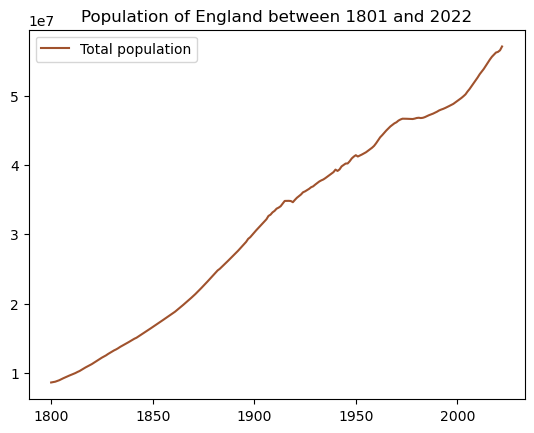

'\nax = sns.lineplot(y=pop_eng_1801_2022[\'Population\'],x=pop_eng_1801_2022.index,label="Total population",color=\'sienna\')\nax.set(xlabel=None, ylabel=None)\nax.ticklabel_format(style=\'sci\', axis=\'y\')\nax.set_title("Population of England between 1801 and 2022")\nfig = ax.get_figure()\nfig.savefig("Output/Pop-Eng-1801-2022.png",dpi=300,bbox_inches="tight")\n'

In [129]:
file = "Data/OWID/Population-of-england.csv"
pop_eng = pd.read_csv(file).drop(columns=['Entity','Code'])
pop_eng = pop_eng.set_index('Year')
pop_eng.columns = ['Population']
pop_eng.index.name = None
pop_eng_1801_2022 = pop_eng.loc[1800:2016,:]
#display(pop_eng_1801_2022)

file = "Model/Population-total-1971-2022-UK.csv"
pop_eng = pd.read_csv(file).set_index('Unnamed: 0')
pop_eng.index.name = None
for i in np.arange(2017,2023):
    pop_eng_1801_2022.loc[i,'Population'] = pop_eng.loc[i,'Population']
display(pop_eng_1801_2022)

def snsline(data,clm,clr,lbl,ttl,nm):
    ax = sns.lineplot(y=data[clm],x=data.index,label=lbl,color=clr)
    ax.set(xlabel=None, ylabel=None)
    ax.ticklabel_format(style='sci', axis='y')
    ax.set_title(ttl)
    fig = ax.get_figure()
    fig.savefig(nm,dpi=300,bbox_inches="tight")
    plt.show()

def snsline_cum(data,clm,clr,lbl,ttl,nm):
    ax = sns.lineplot(y=data[clm],x=data.index,label=lbl,color=clr)
    ax.set(xlabel=None, ylabel=None)
    ax.ticklabel_format(style='sci', axis='y')
    ax.set_title(ttl)
    fig = ax.get_figure()
    fig.savefig(nm,dpi=300,bbox_inches="tight")
    #plt.show()

snsline(pop_eng_1801_2022,'Population','sienna',"Total population","Population of England between 1801 and 2022","Output/Pop-Eng-1801-2022.png")

"""
ax = sns.lineplot(y=pop_eng_1801_2022['Population'],x=pop_eng_1801_2022.index,label="Total population",color='sienna')
ax.set(xlabel=None, ylabel=None)
ax.ticklabel_format(style='sci', axis='y')
ax.set_title("Population of England between 1801 and 2022")
fig = ax.get_figure()
fig.savefig("Output/Pop-Eng-1801-2022.png",dpi=300,bbox_inches="tight")
"""

Let's create our Dynamic Stock Model table of England's dwellings between 1800 and 2022. 

In [4]:
cols = ['Population','Stock','Stock per capita','Stock change','Inflow','Outflow']
DSM = pd.DataFrame(index=np.arange(1801,2023),columns=cols)

DSM['Population'] = pop_eng_1801_2022['Population']

display(DSM)

,Population,Stock,Stock per capita,Stock change,Inflow,Outflow
1801,8671000.0,NaN,NaN,NaN,NaN,NaN
1802,8731000.0,NaN,NaN,NaN,NaN,NaN
1803,8832000.0,NaN,NaN,NaN,NaN,NaN
1804,8945000.0,NaN,NaN,NaN,NaN,NaN
1805,9092000.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2018,55924528.0,NaN,NaN,NaN,NaN,NaN
2019,56230056.0,NaN,NaN,NaN,NaN,NaN
2020,56325961.0,NaN,NaN,NaN,NaN,NaN
2021,56554891.0,NaN,NaN,NaN,NaN,NaN


Let's integrate the Stock data we already processed earlier. 

In [5]:
file = "Model/Stock-1801-2022.csv"
stock_eng = pd.read_csv(file).set_index('Year')

# Every 10 years until 1969 
# 1971 and 1981 are doubled because of crosisng two original datasets 

# We observe that 1971 is two times represented 
stock_eng = stock_eng.drop(index=[1971])
stock_eng = stock_eng.drop(index=[1981])

display(stock_eng)

# The years are not all represented on the stock data
# Let's put in those that we have, and we'll interpolate 

for i in stock_eng.index:
    DSM.loc[i,'Stock'] = stock_eng.loc[i,'All Dwellings']
    DSM.loc[i,'Stock per capita'] = DSM.loc[i,'Stock']/DSM.loc[i,'Population']

display(DSM)
display(DSM['Stock per capita'].to_list())


,All Dwellings
Year,
1801,1.512000e+06
1811,1.714000e+06
1821,2.004000e+06
1831,2.420000e+06
1841,2.890000e+06
...,...
2018,2.421348e+07
2019,2.446124e+07
2020,2.470983e+07


,Population,Stock,Stock per capita,Stock change,Inflow,Outflow
1801,8671000.0,1512000.0,0.174374,NaN,NaN,NaN
1802,8731000.0,NaN,NaN,NaN,NaN,NaN
1803,8832000.0,NaN,NaN,NaN,NaN,NaN
1804,8945000.0,NaN,NaN,NaN,NaN,NaN
1805,9092000.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2018,55924528.0,24213476.671103,0.432967,NaN,NaN,NaN
2019,56230056.0,24461242.780735,0.435021,NaN,NaN,NaN
2020,56325961.0,24709833.890368,0.438694,NaN,NaN,NaN
2021,56554891.0,24927588.0,0.440768,NaN,NaN,NaN


[0.1743743512858955,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.1737631792376318,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.1749148991882692,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.18258638901463708,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.19347927964115955,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.18971462544589773,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.1939680348324749,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.1974176646706587,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.19947699599575058,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.19971432757105187,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.20517094855200366,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.2151079990505578,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.21120371945342178,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.235459286000802

Let's interpolate the missing data. 

In [8]:
def complete(data,col,Y1,Y2,n):
    S1 = data.loc[Y1,col]
    S2 = data.loc[Y2,col]
    r = (S2-S1)/(n+1)
    years = np.arange(Y1,Y2,1)
    replace = np.arange(S1,S2,r)
    replace = replace[1:]
    return replace 

def interpolate(data,col):
    Y1,Y2 = data.index[0],0 # 1801
    n = 0 
    i = data.index[0]
    while i < data.index[-1]:
        i += 1
        if pd.isna(data.loc[i,col]):
            n += 1 
        else:
            Y2 = i
            rep = complete(data,col,Y1,Y2,n)
            data.loc[Y1+1:Y2-1,'Stock per capita'] = complete(data,col,Y1,Y2,n)
            n = 0 
            Y1 = Y2
    return data 

DSM = interpolate(DSM,'Stock per capita')
display(DSM)

for i in DSM[pd.isna(DSM['Stock'])].index:
    DSM.loc[i,'Stock'] = DSM.loc[i,'Stock per capita']*DSM.loc[i,'Population']

for i in DSM.index[1:]:
    DSM.loc[i,'Stock change'] = DSM.loc[i,'Stock'] - DSM.loc[i-1,'Stock']

display(DSM)

DSM.to_csv('Model/DSM_V1.csv')

,Population,Stock,Stock per capita,Stock change,Inflow,Outflow
1801,8671000.0,1512000.0,0.174374,NaN,NaN,NaN
1802,8731000.0,1521928.846762,0.174313,9928.846762,NaN,NaN
1803,8832000.0,1538994.696251,0.174252,17065.849489,NaN,NaN
1804,8945000.0,1558138.492061,0.174191,19143.79581,NaN,NaN
1805,9092000.0,1583188.891386,0.17413,25050.399325,NaN,NaN
...,...,...,...,...,...,...
2018,55924528.0,24213476.671103,0.432967,228170.109632,NaN,NaN
2019,56230056.0,24461242.780735,0.435021,247766.109632,NaN,NaN
2020,56325961.0,24709833.890368,0.438694,248591.109632,NaN,NaN
2021,56554891.0,24927588.0,0.440768,217754.109632,NaN,NaN


,Population,Stock,Stock per capita,Stock change,Inflow,Outflow
1801,8671000.0,1512000.0,0.174374,NaN,NaN,NaN
1802,8731000.0,1521928.846762,0.174313,9928.846762,NaN,NaN
1803,8832000.0,1538994.696251,0.174252,17065.849489,NaN,NaN
1804,8945000.0,1558138.492061,0.174191,19143.79581,NaN,NaN
1805,9092000.0,1583188.891386,0.17413,25050.399325,NaN,NaN
...,...,...,...,...,...,...
2018,55924528.0,24213476.671103,0.432967,228170.109632,NaN,NaN
2019,56230056.0,24461242.780735,0.435021,247766.109632,NaN,NaN
2020,56325961.0,24709833.890368,0.438694,248591.109632,NaN,NaN
2021,56554891.0,24927588.0,0.440768,217754.109632,NaN,NaN


Let's plot the above data. 

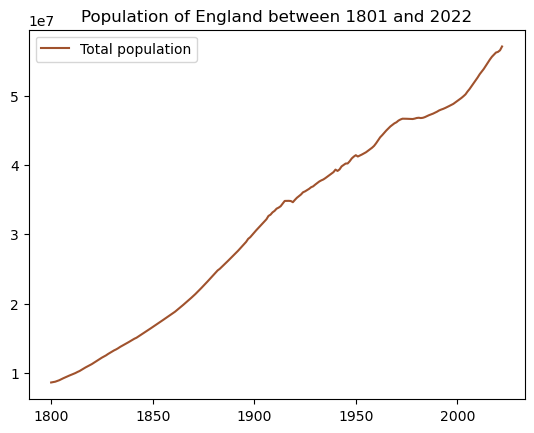

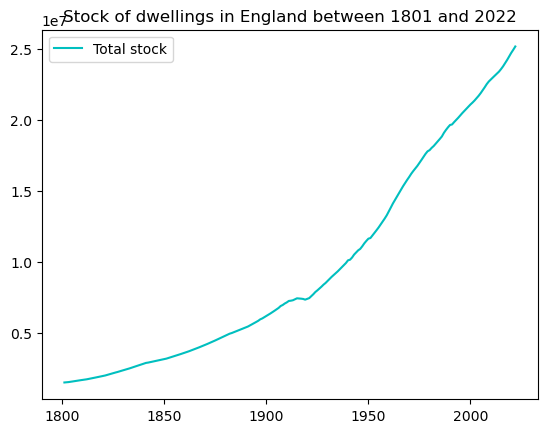

In [7]:
snsline(pop_eng_1801_2022,'Population','sienna',"Total population","Population of England between 1801 and 2022","Output/Pop-Eng-1801-2022.png")
snsline(DSM,'Stock','c',"Total stock","Stock of dwellings in England between 1801 and 2022","Output/Dwe-Eng-1801-2022.png")

# EPISCOPE

Let's integrate the EPISCOPE data. 

In [27]:
# figure S-1.1. from EPISCOBE GB: number of dwellings in 2013 

typ = ['SFH','MFH','TH','AB']
dat = ['pre 1919','1919-1944','1945-1964','1965-1980','1981-1990','1991- 2003','2004-2013']

EPISCOPE_TYP_freq = pd.DataFrame(index = typ, columns = dat)

#                                   SFH     MFH       TH      AB 
EPISCOPE_TYP_freq['pre 1919'] = [615*1000,982*1000,3259*1000,None]
EPISCOPE_TYP_freq['1919-1944'] = [567*1000,314*1000,2811*1000,None]
EPISCOPE_TYP_freq['1945-1964'] = [746*1000,595*1000,3026*1000,82*1000]
EPISCOPE_TYP_freq['1965-1980'] = [1206*1000,952*1000,2291*1000,188*1000]
EPISCOPE_TYP_freq['1981-1990'] = [767*1000,459*1000,695*1000,None]
EPISCOPE_TYP_freq['1991- 2003'] = [785*1000,391*1000,716*1000,None]
EPISCOPE_TYP_freq['2004-2013'] = [214*1000,296*1000,293*1000,49*1000]

display(EPISCOPE_TYP_freq)

EPISCOPE_TYP_spac = pd.DataFrame(index = typ, columns = dat)

# figure S-1.1. from EPISCOBE GB: living space in m2 in 2013 

#                                   SFH     MFH       TH      AB 
EPISCOPE_TYP_spac['pre 1919'] = [117528*1000,66539*1000,318723*1000,701*1000]
EPISCOPE_TYP_spac['1919-1944'] = [81900*1000,18963*1000,246106*1000,1131*1000]
EPISCOPE_TYP_spac['1945-1964'] = [95836*1000,33802*1000,248479*1000,4556*1000]
EPISCOPE_TYP_spac['1965-1980'] = [142846*1000,53172*1000,184076*1000,10789*1000]
EPISCOPE_TYP_spac['1981-1990'] = [91836*1000,22455*1000,47710*1000,723*1000]
EPISCOPE_TYP_spac['1991- 2003'] = [103807*1000,20698*1000,53674*1000,1252*1000]
EPISCOPE_TYP_spac['2004-2013'] = [30281*1000,16835*1000,26630*1000,2981*1000]

display(EPISCOPE_TYP_spac)


,pre 1919,1919-1944,1945-1964,1965-1980,1981-1990,1991- 2003,2004-2013
SFH,615000.0,567000.0,746000,1206000,767000.0,785000.0,214000
MFH,982000.0,314000.0,595000,952000,459000.0,391000.0,296000
TH,3259000.0,2811000.0,3026000,2291000,695000.0,716000.0,293000
AB,NaN,NaN,82000,188000,NaN,NaN,49000


,pre 1919,1919-1944,1945-1964,1965-1980,1981-1990,1991- 2003,2004-2013
SFH,117528000,81900000,95836000,142846000,91836000,103807000,30281000
MFH,66539000,18963000,33802000,53172000,22455000,20698000,16835000
TH,318723000,246106000,248479000,184076000,47710000,53674000,26630000
AB,701000,1131000,4556000,10789000,723000,1252000,2981000


Let's complete the `None` data. To do so we use the surface per dwelling type, we consider the evolution of the dwelling size in `AB` dwelling type, and we reaclulate the number of dwellings.  

,Dwelling size
1945,55.560976
1965,57.388298
2004,60.836735


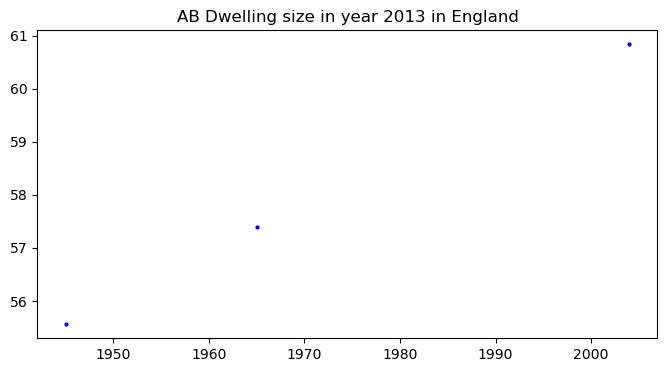

 the polynomial our fit created is: 
            2
-4.991e-05 x + 0.2865 x - 312.9.


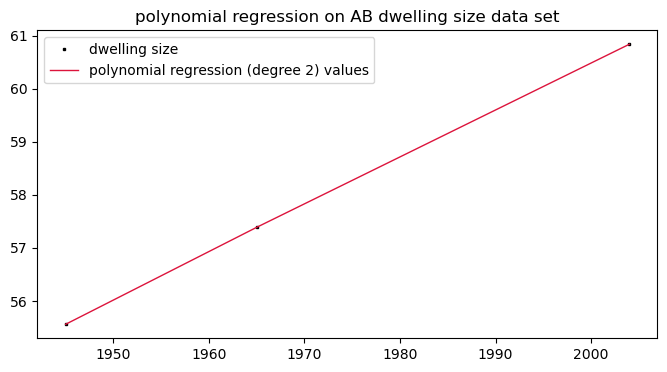

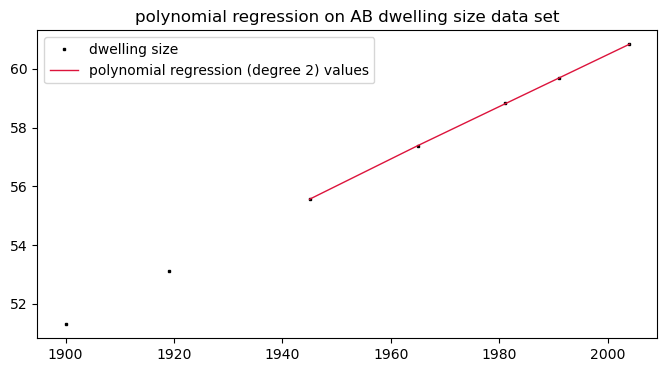

,pre 1919,1919-1944,1945-1964,1965-1980,1981-1990,1991- 2003,2004-2013
SFH,6.150000e+05,5.670000e+05,746000,1206000,767000.000000,785000.000000,214000
MFH,9.820000e+05,3.140000e+05,595000,952000,459000.000000,391000.000000,296000
TH,3.259000e+06,2.811000e+06,3026000,2291000,695000.000000,716000.000000,293000
AB,1.366378e+04,2.128911e+04,82000,188000,12291.443309,20970.075302,49000


In [54]:
s1 = EPISCOPE_TYP_spac.loc['AB','1945-1964']/EPISCOPE_TYP_freq.loc['AB','1945-1964']
s2 = EPISCOPE_TYP_spac.loc['AB','1965-1980']/EPISCOPE_TYP_freq.loc['AB','1965-1980']
s3 = EPISCOPE_TYP_spac.loc['AB','2004-2013']/EPISCOPE_TYP_freq.loc['AB','2004-2013']

dates = [1945,1965,2004]
AB_size = [s1,s2,s3]

AB_size_evolution = pd.DataFrame(index=dates,columns=["Dwelling size"])
AB_size_evolution["Dwelling size"] = AB_size

display(AB_size_evolution)

plt.figure(figsize=(8,4))
plt.plot(AB_size_evolution.index, AB_size_evolution["Dwelling size"], 'o', color = 'blue', markersize = 2, label = f'Dwelling size')
plt.title('AB Dwelling size in year 2013 in England')
plt.show()

degree = 2 # setting the degree
#find polynomial
polynomial = np.poly1d(np.polyfit(AB_size_evolution.index, AB_size_evolution["Dwelling size"], degree))
print(f' the polynomial our fit created is: \n{polynomial}.')
#apply to extended values
AB_size_evolution_reg = polynomial(AB_size_evolution.index)
plt.figure(figsize=(8,4))
plt.plot(AB_size_evolution.index, AB_size_evolution["Dwelling size"], 's', color = 'black', markersize = 2, label = f'dwelling size')
plt.plot(AB_size_evolution.index, AB_size_evolution_reg, color = 'crimson', lw = 1, label = f'polynomial regression (degree {degree}) values')
plt.title('polynomial regression on AB dwelling size data set')
plt.legend()
plt.show()

#display(AB_size_evolution_reg)
#display(polynomial)

# We can now approximate the size of the dwellings depending on there average year of construction

dates = [1900,1919,1945,1965,1981,1991,2004]
AB_size = [polynomial(1900),polynomial(1919),s1,s2,polynomial(1981),polynomial(1991),s3]
AB_size_evolution_approx = pd.DataFrame(index=dates,columns=["Dwelling size"])
AB_size_evolution_approx["Dwelling size"] = AB_size

plt.figure(figsize=(8,4))
plt.plot(AB_size_evolution_approx.index, AB_size_evolution_approx["Dwelling size"], 's', color = 'black', markersize = 2, label = f'dwelling size')
plt.plot(AB_size_evolution.index, AB_size_evolution_reg, color = 'crimson', lw = 1, label = f'polynomial regression (degree {degree}) values')
plt.title('polynomial regression on AB dwelling size data set')
plt.legend()
plt.show()

EPISCOPE_TYP_freq.loc['AB','pre 1919'] = EPISCOPE_TYP_spac.loc['AB','pre 1919']/AB_size_evolution_approx.loc[1900,'Dwelling size']
EPISCOPE_TYP_freq.loc['AB','1919-1944'] = EPISCOPE_TYP_spac.loc['AB','1919-1944']/AB_size_evolution_approx.loc[1919,'Dwelling size']
EPISCOPE_TYP_freq.loc['AB','1981-1990'] = EPISCOPE_TYP_spac.loc['AB','1981-1990']/AB_size_evolution_approx.loc[1981,'Dwelling size']
EPISCOPE_TYP_freq.loc['AB','1991- 2003'] = EPISCOPE_TYP_spac.loc['AB','1991- 2003']/AB_size_evolution_approx.loc[1991,'Dwelling size']

display(EPISCOPE_TYP_freq)

# Fitting the EPISCOPE data with our previous global data

In [58]:
print('The Episcope data gives us a total of dwellings in 2013 :')
display(EPISCOPE_TYP_freq.to_numpy().sum())
print('Our DSM table from national dwelling data gives us in 2013 :')
display(DSM.loc[2013,'Stock'])

The Episcope data gives us a total of dwellings in 2013 :


22367214.40482305

Our DSM table from national dwelling data gives us in 2013 :


23247462.122940928

We end up with a close enough data. We'll conserve the proportions of EPISCOPE and apply them to our DSM data for 2013. This will be our key points in time in order to adjust all further modellisation of lifetime by cohort.

23247462.122940924

23247462.122940928

SFH    21.907064
MFH    17.834139
TH     58.527628
AB      1.731170
dtype: float64

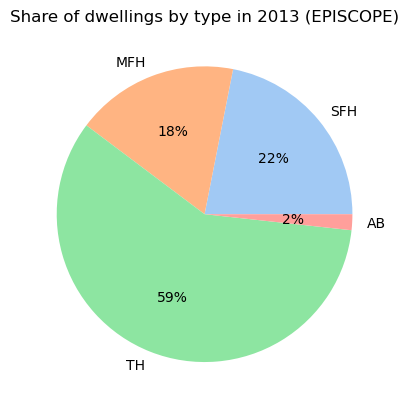

,pre 1919,1919-1944,1945-1964,1965-1980,1981-1990,1991- 2003,2004-2013
SFH,6.392029e+05,5.893139e+05,7.753584e+05,1.253461e+06,797184.804758,815893.183488,222421.836008
MFH,1.020646e+06,3.263573e+05,6.184159e+05,9.894654e+05,477063.657606,406387.560183,307648.894666
TH,3.387256e+06,2.921625e+06,3.145086e+06,2.381161e+06,722351.289840,744177.731691,304530.831544
AB,1.420151e+04,2.212692e+04,8.522706e+04,1.953986e+05,12775.165365,21795.339485,50928.364320


23247462.12294093

In [81]:
cohort_2013_by_TYP = EPISCOPE_TYP_freq.sum(axis=1)
s = cohort_2013_by_TYP.sum()
n = DSM.loc[2013,'Stock']
display(s)
display(n)
for i in cohort_2013_by_TYP.index:
    cohort_2013_by_TYP[i] = cohort_2013_by_TYP[i]/s*100

display(cohort_2013_by_TYP)

# Let's see how the 2013 data is shared: 

colors = sns.color_palette('pastel')[0:5]
plt.pie(cohort_2013_by_TYP, labels = cohort_2013_by_TYP.index, colors = colors, autopct='%.0f%%')
plt.title('Share of dwellings by type in 2013 (EPISCOPE)')
plt.savefig('Output/Share-by-type-2013.png',dpi=300,bbox_inches='tight')
plt.show()

for i in EPISCOPE_TYP_freq.index:
    for j in EPISCOPE_TYP_freq.columns:
        EPISCOPE_TYP_freq.loc[i,j] = EPISCOPE_TYP_freq.loc[i,j]/s*n 

display(EPISCOPE_TYP_freq) # The adjusted data 
display(EPISCOPE_TYP_freq.to_numpy().sum()) 

EPISCOPE_TYP_freq.to_csv('Model/2013-cohort-adjusted.csv')

# 2013 Data: year by year 

We begin to have a nice picture of 2013 cohorts. Now we want to approximate the exact age of each cohort in 2013. 

In [126]:
display(EPISCOPE_TYP_freq)

EPISCOPE_TYP_freq_by_year = pd.DataFrame(index = EPISCOPE_TYP_freq.index, columns=np.arange(1800,2014))
display(EPISCOPE_TYP_freq_by_year)

EPISCOPE_TYP_freq_ratio = pd.DataFrame(index = EPISCOPE_TYP_freq.index, columns=EPISCOPE_TYP_freq.columns)
for i in EPISCOPE_TYP_freq_ratio.index:
    for j in EPISCOPE_TYP_freq_ratio.columns:
        EPISCOPE_TYP_freq_ratio.loc[i,j] = 1
display(EPISCOPE_TYP_freq_ratio)

,pre 1919,1919-1944,1945-1964,1965-1980,1981-1990,1991- 2003,2004-2013
SFH,6.392029e+05,5.893139e+05,7.753584e+05,1.253461e+06,797184.804758,815893.183488,222421.836008
MFH,1.020646e+06,3.263573e+05,6.184159e+05,9.894654e+05,477063.657606,406387.560183,307648.894666
TH,3.387256e+06,2.921625e+06,3.145086e+06,2.381161e+06,722351.289840,744177.731691,304530.831544
AB,1.420151e+04,2.212692e+04,8.522706e+04,1.953986e+05,12775.165365,21795.339485,50928.364320


,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
SFH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MFH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,pre 1919,1919-1944,1945-1964,1965-1980,1981-1990,1991- 2003,2004-2013
SFH,1,1,1,1,1,1,1
MFH,1,1,1,1,1,1,1
TH,1,1,1,1,1,1,1
AB,1,1,1,1,1,1,1


,SFH,MFH,TH,AB
1859,5416.974067,8649.542332,28705.558512,120.351784
1931,22665.920384,12552.202823,112370.197883,851.035562
1954,38767.918145,30920.792623,157254.316767,4261.352933
1972,78341.33593,61841.585245,148822.554409,12212.413893
1985,79718.480476,47706.365761,72235.128984,1277.516536
1996,62761.014114,31260.581553,57244.440899,1676.564576
2008,22242.183601,30764.889467,30453.083154,5092.836432


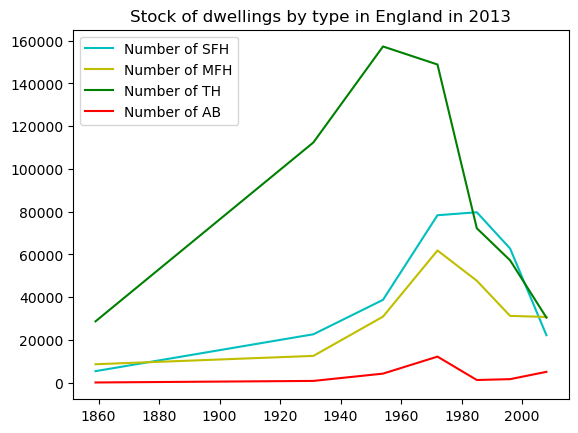

In [137]:
cohorts = [1918,1944,1964,1980,1990,2003,2013]

def mid_year_approx(cohorts,data,table):
    n = len(data.columns)
    t = len(data.index)
    D = []
    L = []
    D.append(int((cohorts[0]+1800)/2))
    L.append(cohorts[0]-1800)
    for i in np.arange(1,len(cohorts[1:])+1):
        D.append(int((cohorts[i]+cohorts[i-1])/2))
        L.append(cohorts[i]-cohorts[i-1])
    #print('D list : ',D)
    #print('L list : ',L)
    V = pd.DataFrame(index=data.index,columns=D)
    for j in np.arange(n):
        for i in np.arange(t):
            v = data.iloc[i,j]/L[j]
            table.loc[table.index[i],D[j]] = v
            V.loc[table.index[i],D[j]] = v
    return V

"""
def mid_year(cohorts,data,table,ratio):
    n = len(data.columns)
    t = len(data.index)
    D = []
    L = []
    D.append(int((cohorts[0]+1800)/2))
    L.append(cohorts[0]-1800)
    for i in np.arange(1,len(cohorts[1:])+1):
        D.append(int((cohorts[i]+cohorts[i-1])/2))
        L.append(cohorts[i]-cohorts[i-1])
    #print('D list : ',D)
    #print('L list : ',L)
    V = pd.DataFrame(index=data.index,columns=D)
    for j in np.arange(n):
        for i in np.arange(t):
            v = data.iloc[i,j]/L[j]
            table.loc[table.index[i],D[j]] = v
            V.loc[table.index[i],D[j]] = v
    display(V)
    for i in table.index:
        for d in np.arange(1800,cohorts[0]+1):
            mid = D[0]
            table.loc[i,d] = table.loc[i,mid]+ratio.loc[i,ratio.columns[j]]*(d-mid)
    for j in np.arange(1,n):
        for i in table.index:
            for d in np.arange(cohorts[j-1],cohorts[j]+1):
                mid = D[j]
                table.loc[i,d] = table.loc[i,mid]+ratio.loc[i,ratio.columns[j]]*(d-mid)
    #for i in np.arange(1800,cohorts[0]):
    return table
"""

approx_year = mid_year_approx(cohorts,EPISCOPE_TYP_freq,EPISCOPE_TYP_freq_by_year)

approx_year = approx_year.T
display(approx_year)

snsline_cum(approx_year,'SFH','c',"Number of SFH","Stock of dwellings by type in England in 2013","Output/Dwe-by-type-Eng-2013.png")
snsline_cum(approx_year,'MFH','y',"Number of MFH","Stock of dwellings by type in England in 2013","Output/Dwe-by-type-Eng-2013.png")
snsline_cum(approx_year,'TH','g',"Number of TH","Stock of dwellings by type in England in 2013","Output/Dwe-by-type-Eng-2013.png")
snsline_cum(approx_year,'AB','r',"Number of AB","Stock of dwellings by type in England in 2013","Output/Dwe-by-type-Eng-2013.png")

Let's do a regression for each type of dwelling, and reajust in order to re-match our reajusted Episcope-table. 

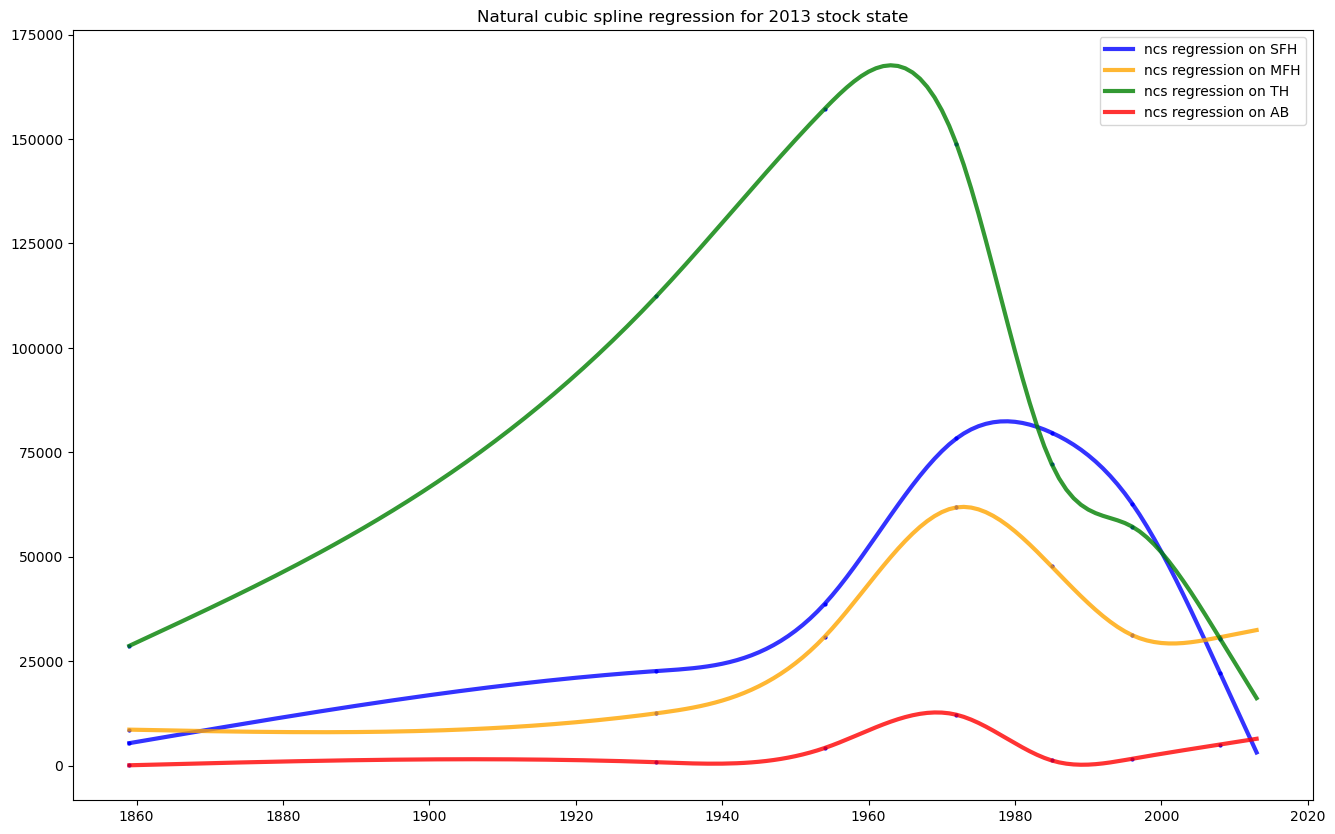

In [252]:
start = 1859 # TO ADJUST
end = 2013
time_range = np.array(np.arange(start,end+1))
#print(time_range)


# Polynomial works very badly here 
"""
degree = 4 # setting the degree

plt.figure(figsize=(8,5))
plt.plot(approx_year.index, approx_year["SFH"], 's', color = 'black', markersize = 2, label = f'dwelling number')
plt.title('Approximative number of SFH dwellings by type in 2013')
plt.legend()
plt.show()

#find polynomial
#display(approx_year.index.to_list())
#display(approx_year["SFH"].to_list())
polynomial_SFH = np.poly1d(np.polyfit(approx_year.index, approx_year["SFH"].to_list(), degree))
#polynomial_MFH = np.poly1d(np.polyfit(approx_year.index, approx_year["MFH"], degree))
#polynomial_TH = np.poly1d(np.polyfit(approx_year.index, approx_year["TH"], degree))
#polynomial_AB = np.poly1d(np.polyfit(approx_year.index, approx_year["AB"], degree))
print(f' the polynomial our fit created is: \n{polynomial_SFH}.')
#print(f' the polynomial our fit created is: \n{polynomial_MFH}.')
#print(f' the polynomial our fit created is: \n{polynomial_TH}.')
#print(f' the polynomial our fit created is: \n{polynomial_AB}.')
#apply to extended values

#approx_year_reg = polynomial_SFH(np.arange(start,end+1))
approx_year_reg = pd.DataFrame(index = np.arange(1859,2008+1),columns=["SFH"])
approx_year_reg["SFH"] = [polynomial_SFH(x) for x in approx_year_reg.index]

plt.figure(figsize=(8,5))
plt.plot(approx_year.index, approx_year["SFH"], 's', color = 'black', markersize = 2, label = f'dwelling number')
plt.plot(approx_year_reg.index, approx_year_reg["SFH"], color = 'crimson', lw = 1, label = f'polynomial regression (degree {degree}) values')
plt.title('polynomial regression on number of dwellings by type in 2013')
plt.legend()
"""

#display(time_range)
approx_SFH = np.array(approx_year["SFH"].to_list())
#display(approx_SFH)

ncs_SFH = ncs.get_natural_cubic_spline_model(np.array(approx_year.index), approx_SFH, minval=min(time_range), 
                                               maxval=max(time_range), knots = approx_year.index.to_list())

SFH_ncs = ncs_SFH.predict(time_range)

plt.figure(figsize=(16,10))

plt.plot(approx_year.index, approx_year["SFH"], 'o', color = 'blue', markersize = 2)#, label = f'Number of SFH')
plt.plot(time_range, SFH_ncs, color = 'blue', lw = 3, alpha = 0.8, label = 'ncs regression on SFH')

approx_MFH = np.array(approx_year["MFH"].to_list())
ncs_MFH = ncs.get_natural_cubic_spline_model(np.array(approx_year.index), approx_MFH, minval=min(time_range), 
                                             maxval=max(time_range), knots = approx_year.index.to_list())
MFH_ncs = ncs_MFH.predict(time_range)

plt.plot(approx_year.index, approx_year["MFH"], 'o', color = 'blue', markersize = 2)#, label = f'Number of MFH')
plt.plot(time_range, MFH_ncs, color = 'orange', lw = 3, alpha = 0.8, label = 'ncs regression on MFH')

approx_TH = np.array(approx_year["TH"].to_list())
ncs_TH = ncs.get_natural_cubic_spline_model(np.array(approx_year.index), approx_TH, minval=min(time_range), 
                                             maxval=max(time_range), knots = approx_year.index.to_list())
TH_ncs = ncs_TH.predict(time_range)

plt.plot(approx_year.index, approx_year["TH"], 'o', color = 'blue', markersize = 2)#, label = f'Number of TH')
plt.plot(time_range, TH_ncs, color = 'green', lw = 3, alpha = 0.8, label = 'ncs regression on TH')

approx_AB = np.array(approx_year["AB"].to_list())
ncs_AB = ncs.get_natural_cubic_spline_model(np.array(approx_year.index), approx_AB, minval=min(time_range), 
                                             maxval=max(time_range), knots = approx_year.index.to_list())
AB_ncs = ncs_AB.predict(time_range)

#display(ncs_AB)
#display(AB_ncs)

plt.plot(approx_year.index, approx_year["AB"], 'o', color = 'blue', markersize = 2)#, label = f'Number of AB')
plt.plot(time_range, AB_ncs, color = 'red', lw = 3, alpha = 0.8, label = 'ncs regression on AB')

plt.legend()
plt.title('Natural cubic spline regression for 2013 stock state')
plt.savefig('Output/Dwe-stock-2013-by-type.png',dpi=300,bbox_inches='tight')
plt.show()

# Cohorts 

Let's create our cohort tables for each type of dwelling. 

In [281]:
start = 1600 # TO ADJUST
projection = 2050 
time_frame = np.array(np.arange(start,projection+1))

cohort_SFH = pd.DataFrame(index=time_frame,columns=time_frame)
cohort_MFH = pd.DataFrame(index=time_frame,columns=time_frame)
cohort_TH = pd.DataFrame(index=time_frame,columns=time_frame)
cohort_AB = pd.DataFrame(index=time_frame,columns=time_frame)


def fill_cohort_with_zeros(cohort):
    time = cohort.columns
    for j in time:
        for i in np.arange(j+1,time[-1]+1):
            cohort.loc[i,j] = 0
    return cohort 

cohort_SFH = fill_cohort_with_zeros(cohort_SFH)
cohort_MFH = fill_cohort_with_zeros(cohort_MFH)
cohort_TH = fill_cohort_with_zeros(cohort_TH)
cohort_AB = fill_cohort_with_zeros(cohort_AB)

display(cohort_MFH)


,1600,1601,1602,1603,1604,1605,1606,1607,1608,1609,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
1600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1601,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1602,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1603,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1604,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
2047,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
2048,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2049,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,NaN,NaN


Let's fill in the 2013 data for each type of dwelling, that we just modelled.

In [283]:
start = 1600 # TO ADJUST
end = 2013
time_range = np.array(np.arange(start,end+1))

def fill_cohort_column(ncs,cohort,time,year):
    start = time[0]
    for i in time:
        n = ncs[i-start]
        if n >= 0:
            cohort.loc[i,year] = ncs[i-start]
        else:
            cohort.loc[i,year] = 0
    return cohort 

AB_ncs = ncs_AB.predict(time_range)
#display(AB_ncs[0])
cohort_AB = fill_cohort_column(AB_ncs,cohort_AB,time_range,2013)

TH_ncs = ncs_TH.predict(time_range)
#display(TH_ncs[0])
cohort_TH = fill_cohort_column(TH_ncs,cohort_TH,time_range,2013)

SFH_ncs = ncs_SFH.predict(time_range)
#display(SFH_ncs[0])
cohort_SFH = fill_cohort_column(SFH_ncs,cohort_SFH,time_range,2013)

MFH_ncs = ncs_MFH.predict(time_range)
#display(MFH_ncs[0])
cohort_MFH = fill_cohort_column(MFH_ncs,cohort_MFH,time_range,2013)

display(cohort_AB[2013])
display(cohort_SFH)

1600    0
1601    0
1602    0
1603    0
1604    0
       ..
2046    0
2047    0
2048    0
2049    0
2050    0
Name: 2013, Length: 451, dtype: object

,1600,1601,1602,1603,1604,1605,1606,1607,1608,1609,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
1600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1601,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1602,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1603,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1604,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
2047,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
2048,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2049,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,NaN,NaN


Let's adjust our total 2013 stock of cohorts, taking the type shares into account, to our data. 

23247462.12294093
23247462.122940928
23247462.12294093


,pre 1919,1919-1944,1945-1964,1965-1980,1981-1990,1991- 2003,2004-2013
SFH,6.392029e+05,5.893139e+05,7.753584e+05,1.253461e+06,797184.804758,815893.183488,222421.836008
MFH,1.020646e+06,3.263573e+05,6.184159e+05,9.894654e+05,477063.657606,406387.560183,307648.894666
TH,3.387256e+06,2.921625e+06,3.145086e+06,2.381161e+06,722351.289840,744177.731691,304530.831544
AB,1.420151e+04,2.212692e+04,8.522706e+04,1.953986e+05,12775.165365,21795.339485,50928.364320


5092836.431963005

,1600,1601,1602,1603,1604,1605,1606,1607,1608,1609,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
1600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1601,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1602,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1603,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1604,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
2047,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
2048,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2049,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,NaN,NaN


23247462.12294093
23247462.122940928


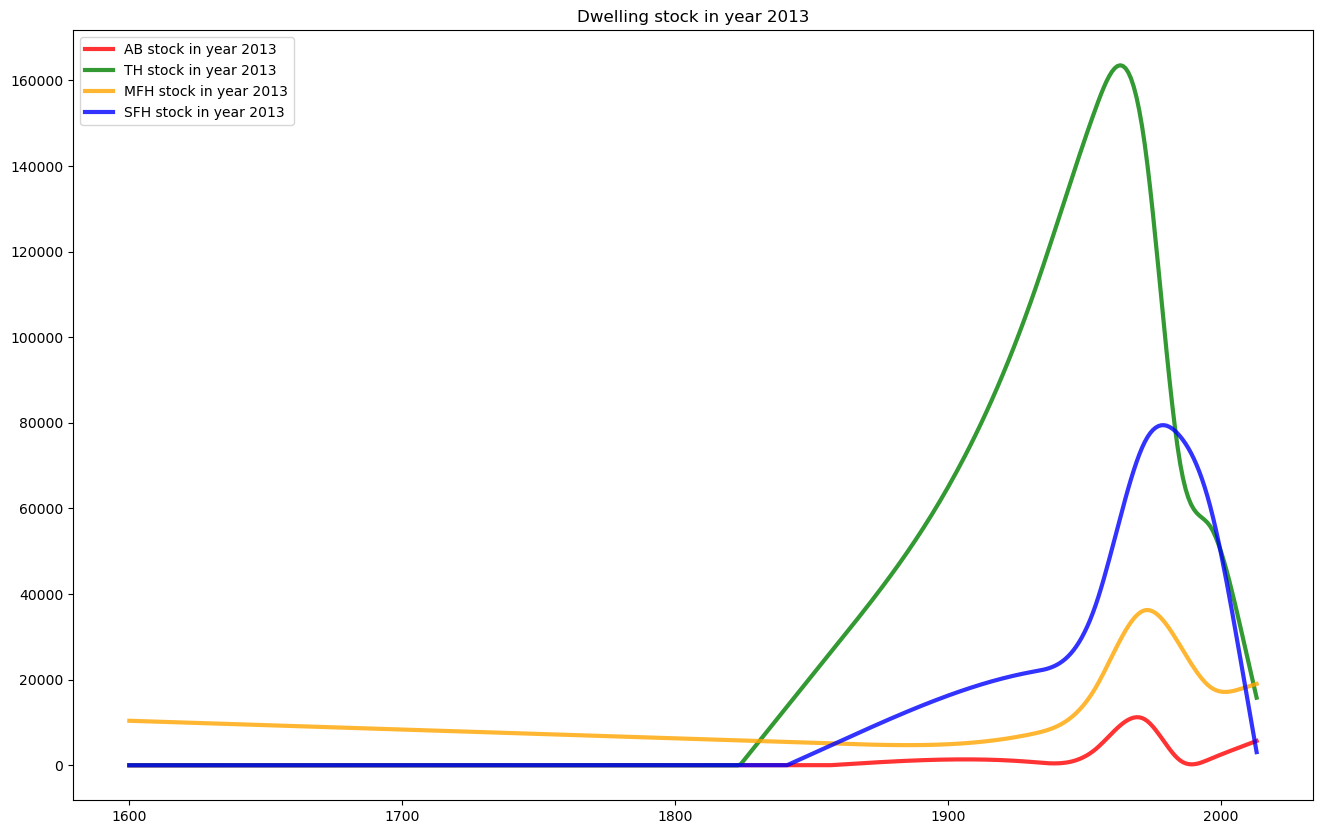

In [312]:
print(cohort_AB[2013].sum()+cohort_TH[2013].sum()+cohort_MFH[2013].sum()+cohort_SFH[2013].sum())
print(DSM.loc[2013,'Stock'])

# Again, we will adjust the 2013 column to our Stock 

print(EPISCOPE_TYP_freq.values.sum())
display(EPISCOPE_TYP_freq)

EPISCOPE_TYP = EPISCOPE_TYP_freq.sum(axis=1)
display(EPISCOPE_TYP['SFH'])

def adjust_cohort_column_to_total_stock(cohort,year,sum_type):
    total_cohort = cohort[year].sum()
    for i in cohort.index:
        cohort.loc[i,year] = cohort.loc[i,year]/total_cohort*sum_type
    return cohort 

cohort_AB = adjust_cohort_column_to_total_stock(cohort_AB,2013,EPISCOPE_TYP['AB'])
#display(cohort_AB)
cohort_TH = adjust_cohort_column_to_total_stock(cohort_TH,2013,EPISCOPE_TYP['TH'])
#display(cohort_TH)
cohort_MFH = adjust_cohort_column_to_total_stock(cohort_MFH,2013,EPISCOPE_TYP['MFH'])
display(cohort_MFH)
cohort_SFH = adjust_cohort_column_to_total_stock(cohort_SFH,2013,EPISCOPE_TYP['SFH'])
#display(cohort_SFH)

print(cohort_AB[2013].sum()+cohort_TH[2013].sum()+cohort_MFH[2013].sum()+cohort_SFH[2013].sum())
print(DSM.loc[2013,'Stock'])


plt.figure(figsize=(16,10))
plt.plot(np.arange(1600,2014), cohort_AB.loc[1600:2013,2013], color = 'red', lw = 3, alpha = 0.8, label = 'AB stock in year 2013')
plt.plot(np.arange(1600,2014), cohort_TH.loc[1600:2013,2013], color = 'green', lw = 3, alpha = 0.8, label = 'TH stock in year 2013')
plt.plot(np.arange(1600,2014), cohort_MFH.loc[1600:2013,2013], color = 'orange', lw = 3, alpha = 0.8, label = 'MFH stock in year 2013')
plt.plot(np.arange(1600,2014), cohort_SFH.loc[1600:2013,2013], color = 'blue', lw = 3, alpha = 0.8, label = 'SFH stock in year 2013')
plt.legend()
plt.title('Dwelling stock in year 2013')
plt.savefig('Output/Dwe-stock-2013-by-type-adjusted.png',dpi=300,bbox_inches='tight')
plt.show()


# Lifetime and filling cohorts before 2013

Now we have our 2013 year fixed in our cohorts. We want to find a lifetime, proper to each type of dwelling, that fits the cohort while matching our total stock of dwellings. 

0.007261739234418352


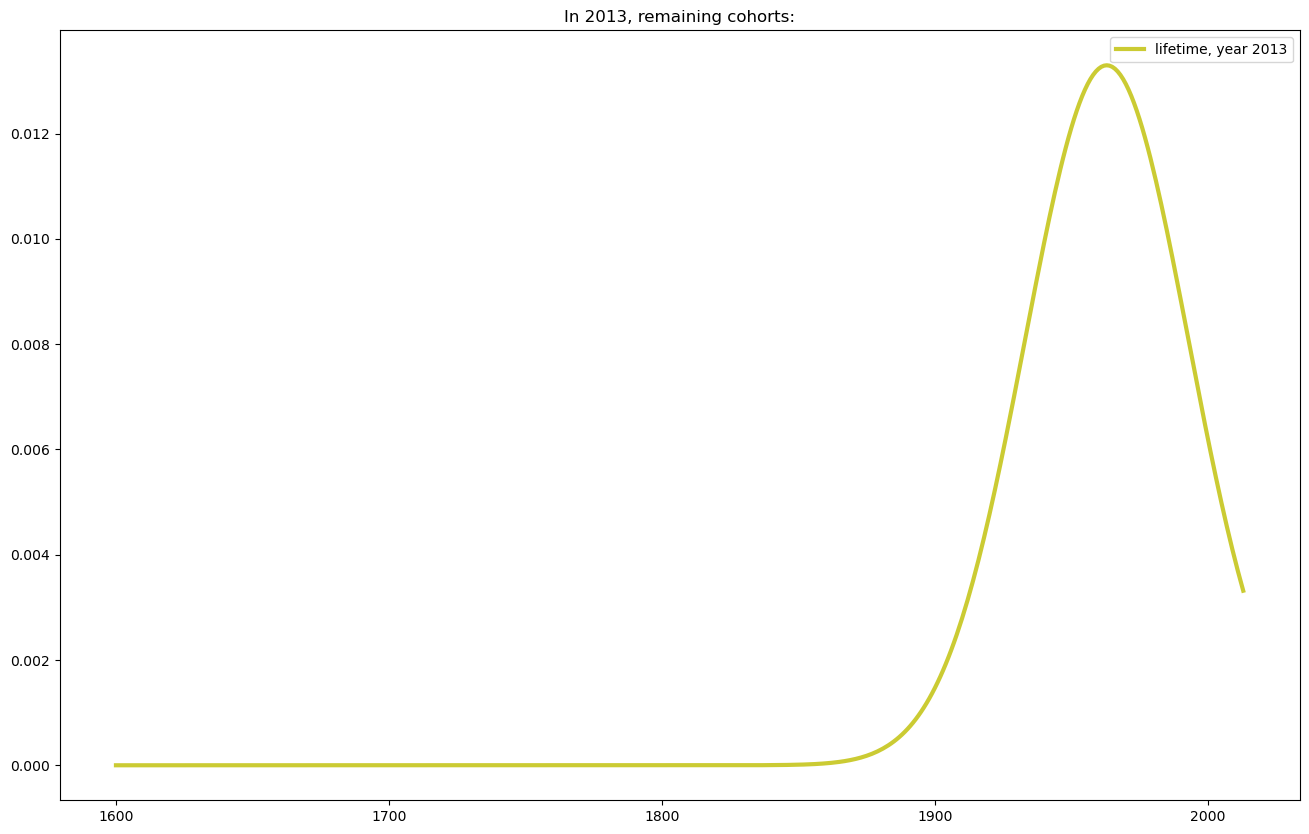

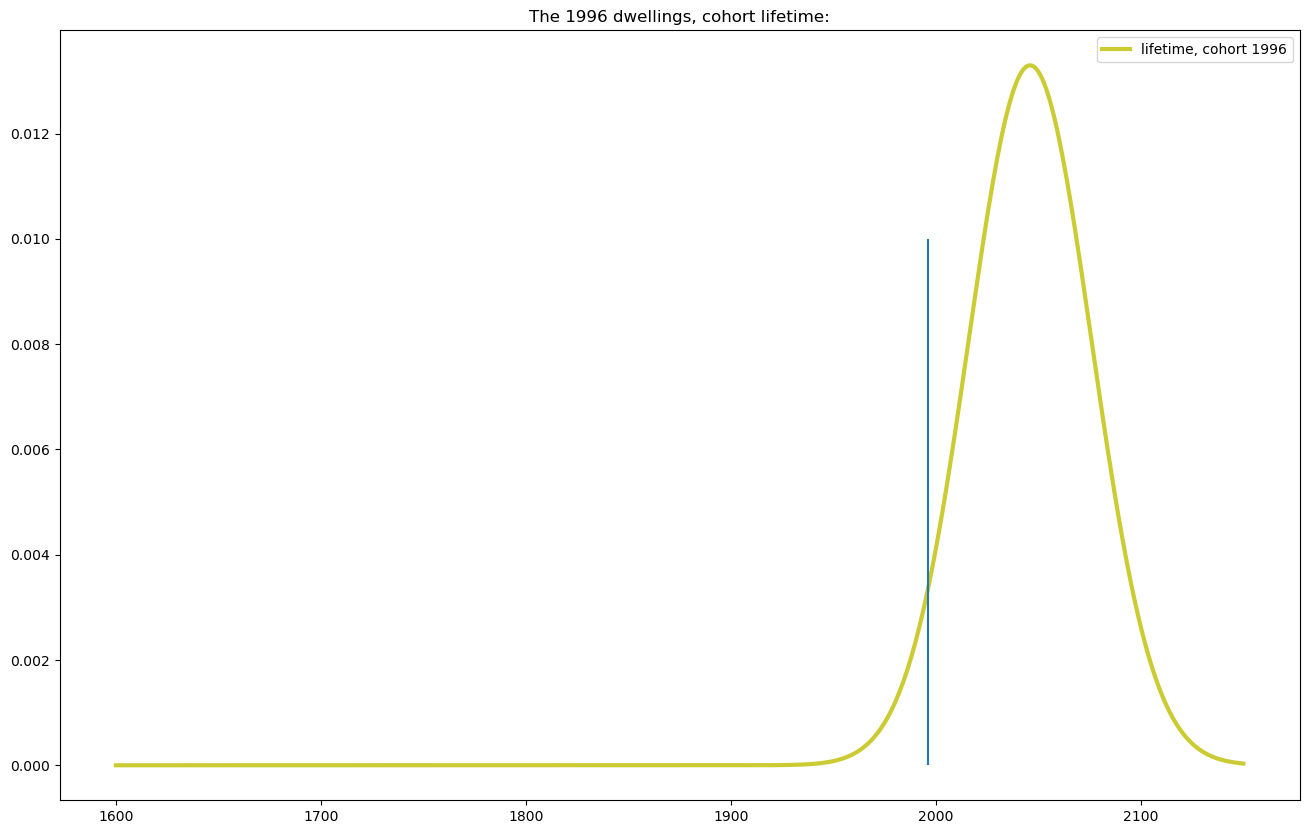

55842.70953272935

integrating :  (504.0, 5.595524044110789e-12)


,1600,1601,1602,1603,1604,1605,1606,1607,1608,1609,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
1600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1601,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1602,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1603,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1604,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
2047,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
2048,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2049,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,NaN,NaN


In [343]:
CHRTS = [cohort_AB,cohort_MFH,cohort_SFH,cohort_TH]

# REPLACE WITH scipy.stats.skewnorm

# STOCK FUTURE BAU : DATA > GOV UK 

# let's try tp find an approximation of the lifetimes, by cohorts 

def lifetime_TH(year,c):
    sigma = 20 # years, the standard deviation
    tau = 50 # years, the mean lifetime
    lifetime = (1/(sigma*(2*np.pi)**(1/2)))*np.exp(-(year-c-tau)**2/(2*sigma**2))
    return lifetime

def lifetime_TH_fixed_year(c):
    fixed_year = 2013
    return lifetime_TH(fixed_year,c)

def lifetime_TH_fixed_cohort(year):
    fixed_cohort = 1996
    return lifetime_TH(year,fixed_cohort)

def lifetime_TH_adjusted(year,c):
    if year < c:
        return 0
    else:
        return lifetime_TH(year,c)/lifetime_TH_fixed_cohort(year)

def lifetime_TH_adjusted_fixed_cohort(year):
    fixed_cohort = 1996
    return lifetime_TH_adjusted(year,fixed_cohort)

def lifetime_AB(year,c):
    sigma = 30 # years, the standard deviation
    tau = 50 # years, the mean lifetime
    lifetime = (1/(sigma*(2*np.pi)**(1/2)))*np.exp(-(year-c-tau)**2/(2*sigma**2))
    return lifetime

def lifetime_MFH(year,c):
    sigma = 30 # years, the standard deviation
    tau = 50 # years, the mean lifetime
    lifetime = (1/(sigma*(2*np.pi)**(1/2)))*np.exp(-(year-c-tau)**2/(2*sigma**2))
    return lifetime

def lifetime_SFH(year,c):
    sigma = 30 # years, the standard deviation
    tau = 50 # years, the mean lifetime
    lifetime = (1/(sigma*(2*np.pi)**(1/2)))*np.exp(-(year-c-tau)**2/(2*sigma**2))
    return lifetime

print(lifetime_TH(2013,1996))

LT_TH = [lifetime_TH(2013,x) for x in np.arange(1600,2014)]
plt.figure(figsize=(16,10))
plt.plot(np.arange(1600,2014), LT_TH, color = 'y', lw = 3, alpha = 0.8, label = 'lifetime, year 2013')
plt.legend()
plt.title('In 2013, remaining cohorts:')
plt.savefig('Output/2013-year-lifetime.png',dpi=300,bbox_inches='tight')
plt.show()

LT_TH = [lifetime_TH(x,1996) for x in np.arange(1600,2151)]
plt.figure(figsize=(16,10))
plt.plot(np.arange(1600,2151), LT_TH, color = 'y', lw = 3, alpha = 0.8, label = 'lifetime, cohort 1996')
plt.vlines(x=1996,ymin=0,ymax=0.010)
plt.legend()
plt.title('The 1996 dwellings, cohort lifetime:')
plt.savefig('Output/1996-cohort-lifetime.png',dpi=300,bbox_inches='tight')
plt.show()

display(cohort_TH.loc[1996,2013])

remainings_TH = integrate.quad(lifetime_TH_adjusted_fixed_cohort,1996,2500)
print('integrating : ',remainings_TH)

# PLUS SIMPLE= INTEGRER ????

"""
def remaining(lifetime,year,c):
    start = 1600
    remains = 0 
    for i in np.arange(start,year+1):
        remains += lifetime(year,c)
    return remains
"""
    
"""
RM_TH = [remaining(lifetime_TH,2013,x) for x in np.arange(1600,2014)]
plt.figure(figsize=(16,10))
plt.plot(np.arange(1600,2014), LT_TH, color = 'y', lw = 3, alpha = 0.8, label = 'TH lifetime')
plt.legend()
plt.title('Lifetime model')
plt.savefig('Output/lifetime-plot.png',dpi=300,bbox_inches='tight')
plt.show()
"""

"""
def propager_lifetime_on_index(cohort,ref_year,lifetime):
    start = cohort.columns[0]
    end = cohort.columns[-1]
    for c in cohort.index:
        built = 
        for j in cohort.columns[:ref_year-start]:
            #
        for j in cohort.columns[ref_year+1:end-start+1]:
            #
    return cohort


# We want to go the other way around: find the lifetime model depending in the 2013 data. 
        
cohort_TH = propager_lifetime_on_index(cohort_TH,2013)
"""

display(cohort_TH)